In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

PointCloud
===============
Suppose we have `N` data points in `R^k` stored in `X` which is a numpy.ndarray array with shape `N`-by-`k`.
In this example, we have loaded some data from the file `tests/circle.npy`, `tests/normal.npy`, and `tests/square.npy`, each of which contains `1000` data points in `R^2`.  Then, we'll shift them around to make an interesting pointcloud with 3000 points.

In [2]:
import numpy as np
circ = np.load('../tests/circle.npy') + np.array([5., 5.])
norm = np.load('../tests/normal.npy') * np.array([3.,0.5]) + np.array([-5., 0])
square = np.load('../tests/square.npy') * np.array([0.9, 1.2]) + np.array([-2, 6.])
X = np.concatenate([circ, norm, square])



A SimplicialComplex with 3000 points, 0 edges, and 0 faces.


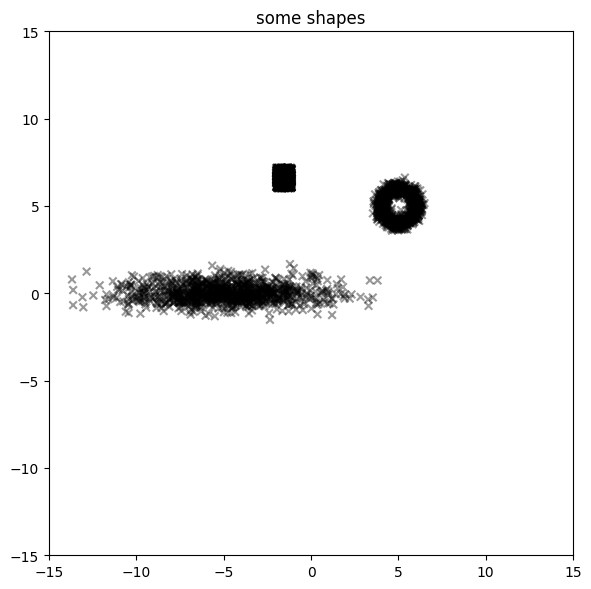

In [3]:
import multidim
pc = multidim.PointCloud(X)
print(pc)
fig, ax = plt.subplots(figsize=(6,6),dpi=100)
pc.plot(ax, title='some shapes')
ax.set_aspect('equal')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
plt.tight_layout()
plt.show()

Persistence Diagrams
-------------------

We would like to compute the 0-dimensional persistence of this dataset.  Howevever,
if we run `make_pers0()` now, it will fail, because we have not placed any edges between the vertices.
Remember, PointCloud is just an embedded form of SimplicialComplex!

In [4]:
try: 
    pc.make_pers0()
except ValueError as e:
    print("whoops!  See this exception\n{}".format(e))

whoops!  See this exception
This SimplicialComplex has no 1-stratum (edges).  Persistence is meaningless.


To fix the problem, we re-initialize the PointCloud, computing all the edges up to some length.
Then, we can compute the persistence diagram up to some maximum distance "cutoff".
Here, we compute them all the way.  (using -1.0 as the limit, which in this case is shorthand for infinity)

In [5]:
pc = multidim.PointCloud(X, max_length=-1.0)
print(pc)
pc.make_pers0(cutoff=-1.0)

A SimplicialComplex with 3000 points, 4498500 edges, and 0 faces.


In [6]:
pc.pers0.diagram

,birth_index,death_index,birth,death,pers
0,2904,2904,1.0,0.000579,-0.999421
1,2504,2504,1.0,0.000994,-0.999006
2,866,866,1.0,0.001142,-0.998858
3,2607,2607,1.0,0.001476,-0.998524
4,2879,2879,1.0,0.001672,-0.998328
5,2901,2901,1.0,0.001720,-0.998280
6,187,187,1.0,0.001997,-0.998003
7,2741,2741,1.0,0.002007,-0.997993
8,2936,2936,1.0,0.002030,-0.997970
9,2701,2701,1.0,0.002293,-0.997707


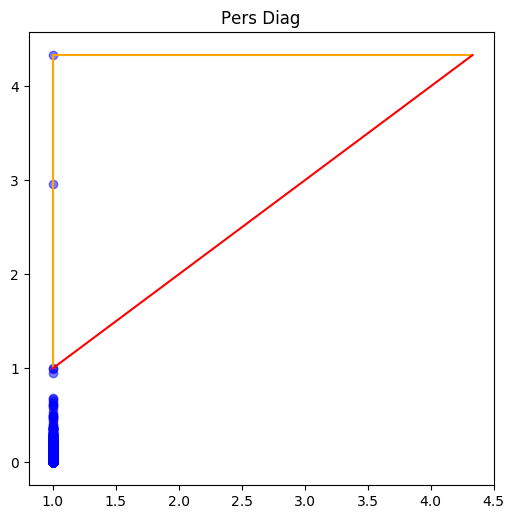

In [7]:
fig, ax = plt.subplots(figsize=(6,6),dpi=100)
pc.pers0.plot(ax)
plt.show()

Severing a PointCloud 
---------------------

Suppose we want to sever the connected components of our pointcloud, up to some persistence.

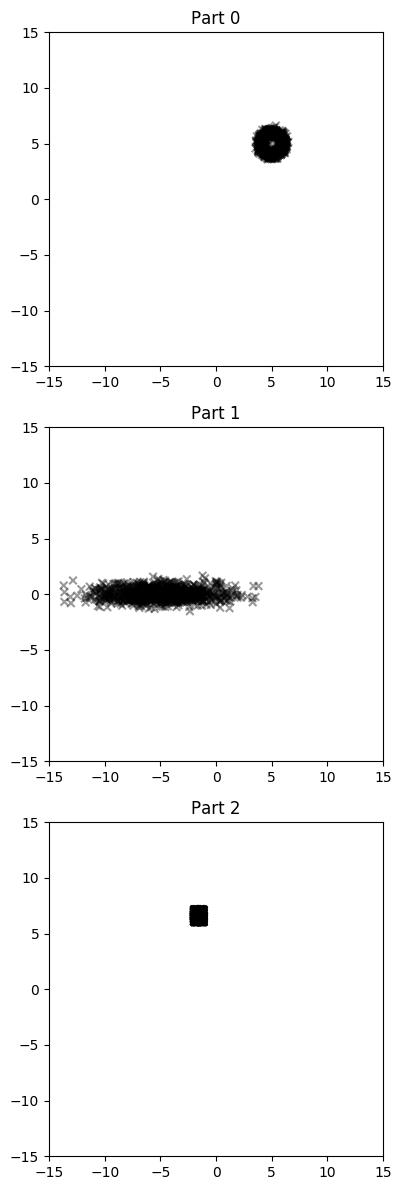

In [8]:
pc.reset()  # reset the persistence diagram, but don't both re-comptuing all the edges
pc.make_pers0(cutoff=2.0)

fig,ax = plt.subplots(3, figsize=(4,12),dpi=100)
for i, (sub_index, sub_pc) in enumerate(pc.sever()):
    sub_pc.plot(ax[i], title="Part {}".format(i)) 
    ax[i].set_aspect('equal')
    ax[i].set_xlim(-15,15) 
    ax[i].set_ylim(-15,15)

plt.tight_layout()
plt.show()

Efficiency
----------

In the example above, we wanted to see *all* of the edges, but if you know _a priori_ that you only want edges up to some small length, then there is a more efficient way.  (This is because the CoverTree can be computed to find small edges.) Initialize the `PointCloud` with the `max_length` option.

In [9]:
pc = multidim.PointCloud(X, max_length=0.1)
print(pc)
pc.make_pers0()

A SimplicialComplex with 3000 points, 17620 edges, and 0 faces.


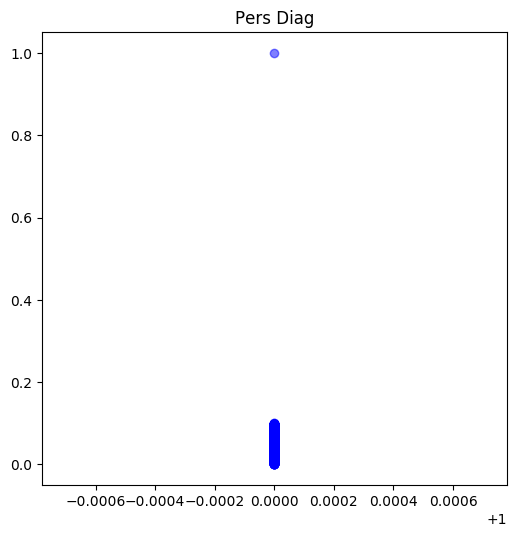

In [10]:
fig, ax = plt.subplots(figsize=(6,6),dpi=100)
pc.pers0.plot(ax)
plt.show()